In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df = pd.read_csv(r"D:\Ml MODELS JANUARY\logistic regression diabetes\archive (1)\diabetes2.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
y=df["Outcome"]

In [5]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [6]:
df=df.drop(columns=["Outcome"])
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [7]:
#in this notebook i have perform my analysis in 3 steps first will be analysis and feature selection
#after completion of eda (elaborative data analysis) i will move on to my ml model using scikit learn
#once i am done with the model i will then move towards elavuation matrices to evaluate the model which i have built

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


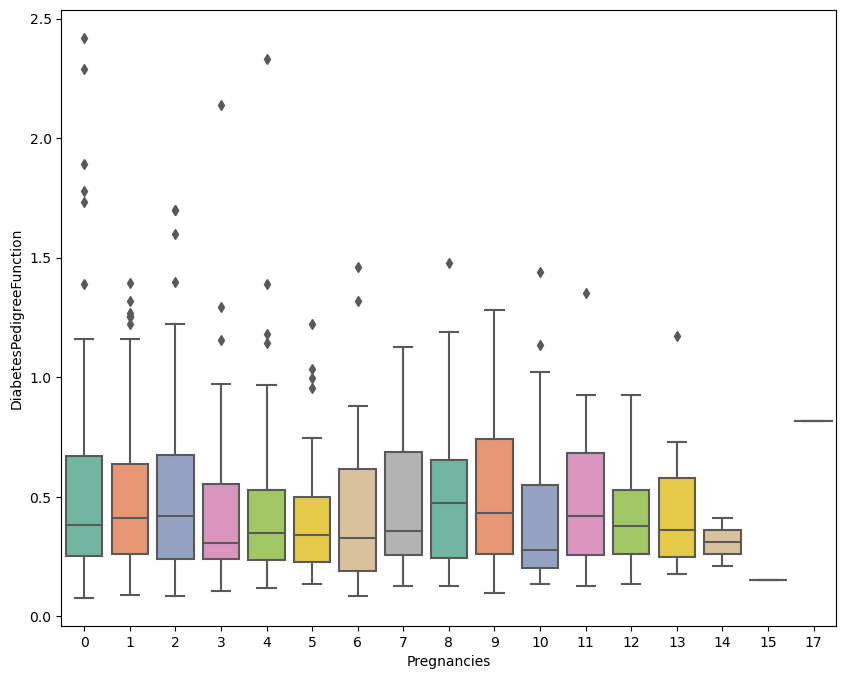

In [9]:
plt.figure(figsize=(10,8))
sns.boxplot(x="Pregnancies",y="DiabetesPedigreeFunction",data=df,palette="Set2")
plt.show()

In [10]:
#now lets move towards the correalation matrix between different variables
corr_mat=df.corr()

In [11]:
corr_mat

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


<AxesSubplot:>

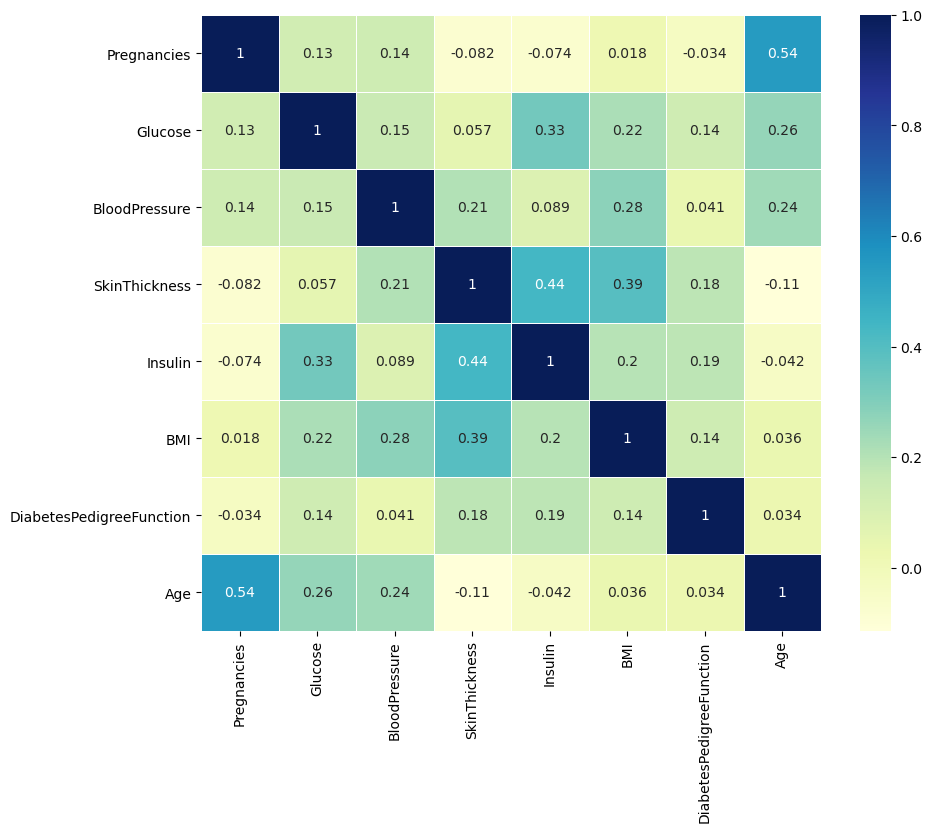

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_mat,annot=True,linewidth=0.5,linecolor='white',cmap="YlGnBu")

In [13]:
#through the heat map we can choose the threshold and then remove features
threshold =0.6
removed=set()
for i in range(corr_mat.shape[1]):
    for j in range(i):
        if abs(corr_mat.iloc[i,j])>threshold:
            name=corr_mat.columns[i]
            removed.add(name)

In [14]:
removed


set()

In [15]:
#this means that there are no features can be eleiminated if we choose threshold as 0.6
#alternatively i will now use wrapper methods while building and then compare both results(with and without feature selection)


In [16]:
#lets scale the model before training it
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
df_scaled=min_max.fit_transform(df)

In [17]:
print(df_scaled)

[[0.35294118 0.74371859 0.59016393 ... 0.50074516 0.23441503 0.48333333]
 [0.05882353 0.42713568 0.54098361 ... 0.39642325 0.11656704 0.16666667]
 [0.47058824 0.91959799 0.52459016 ... 0.34724292 0.25362938 0.18333333]
 ...
 [0.29411765 0.6080402  0.59016393 ... 0.390462   0.07130658 0.15      ]
 [0.05882353 0.63316583 0.49180328 ... 0.4485842  0.11571307 0.43333333]
 [0.05882353 0.46733668 0.57377049 ... 0.45305514 0.10119556 0.03333333]]


In [18]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [19]:
#we have preprocessed our data succesfully now lets build our logistic regression machine learning model
#splitting of model
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_scaled,y,test_size=0.2,random_state=42)

In [20]:
#finding size of my training datset
X_train.shape

(614, 8)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [22]:
model=LogisticRegression()
model.fit(X_train,y_train)
#now lets make one prediction matrix
y_pred=model.predict(X_test)
#lets test our model through confusion matrix
c_matrix=confusion_matrix(y_test,y_pred)

In [23]:
c_matrix

array([[86, 13],
       [23, 32]], dtype=int64)

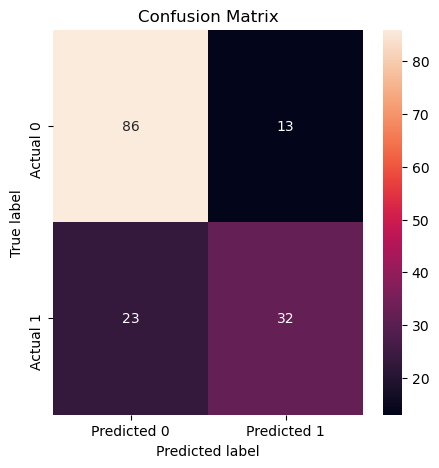

In [24]:
#lets now see confusion matrix pictorically
plt.figure(figsize=(5,5))
sns.heatmap(c_matrix,xticklabels=["Predicted 0","Predicted 1"],
    yticklabels=["Actual 0","Actual 1"],annot=True)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()

In [25]:
#lets calculate accuracy,f1 score and classification report for this model as well
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [26]:
print(accuracy)

0.7662337662337663


In [27]:
print(classification_rep)

              precision    recall  f1-score   support

           0       0.79      0.87      0.83        99
           1       0.71      0.58      0.64        55

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.73       154
weighted avg       0.76      0.77      0.76       154

